In [23]:
from langgraph.graph import StateGraph, MessagesState, add_messages,END
from typing import Annotated, TypedDict
from langchain_core.messages import AnyMessage, HumanMessage, AIMessage

In [5]:
class CustomState(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]
    added_key1: str
    added_key2: str

In [12]:
class ExtendedMessagesState(MessagesState):
    # message with messagestate will be prebuilt present in the state
    added_key1: str
    added_key2: str



In [20]:
# add message example

initial_messages = [HumanMessage("Hello, world!", name='lance',id=1), AIMessage("Hello, human!",name='robot',id=2)]

new_message = HumanMessage("How are you?",name='lance',id=3)

add_messages(initial_messages, new_message)

[HumanMessage(content='Hello, world!', additional_kwargs={}, response_metadata={}, name='lance', id='1'),
 AIMessage(content='Hello, human!', additional_kwargs={}, response_metadata={}, name='robot', id='2'),
 HumanMessage(content='How are you?', additional_kwargs={}, response_metadata={}, name='lance', id='3')]

In [21]:
from langchain_core.messages import RemoveMessage

delete_message = RemoveMessage(id=1)
add_messages(initial_messages, delete_message)

[AIMessage(content='Hello, human!', additional_kwargs={}, response_metadata={}, name='robot', id='2')]

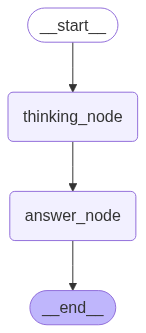

{'answer': 'bye lance'}

In [27]:
# Multiple States Schema
from IPython.display import display, Image

class question_state(TypedDict):
    question: str

class answer_state(TypedDict):
    answer: str

class overall_state(TypedDict):
    question: str
    answer: str
    notes: str


def thinking_node(state: question_state) -> overall_state:
    # Simulate thinking
    return {"answer":"bye","notes":"some notes"}

def answer_node(state: overall_state) -> answer_state:
    return {"answer": "bye lance"}

graph = StateGraph(overall_state,input=question_state, output=answer_state)
graph.add_node("thinking_node",thinking_node)
graph.add_node("answer_node", answer_node)
graph.set_entry_point("thinking_node")
graph.add_edge("thinking_node", "answer_node")
graph.add_edge("answer_node", END)

app = graph.compile()
display(Image(app.get_graph(xray=True).draw_mermaid_png()))

app.invoke({'question': 'How are you?'})